In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "D:/projects/football_analysis/output_video/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

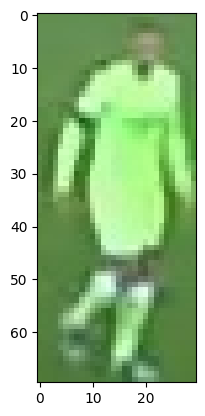

In [3]:
plt.imshow(image)
plt.show()

#### Tshirt always be in top half so taking top half of the image

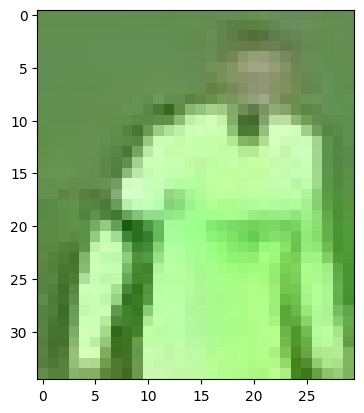

In [ ]:
top_half_img = image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_img)

##### We need to find the tshirt color but in our image we have playground(grass) color also. To solve this problem we cluster all image colors to two category; one will be playground color and another will be tshirt color.

In [12]:
# Cluster the image into two clusters

# Reshaping the image into 2d array
image_2d = top_half_img.reshape(-1, 3)

# Perform k-means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

KMeans(n_clusters=2, random_state=42)

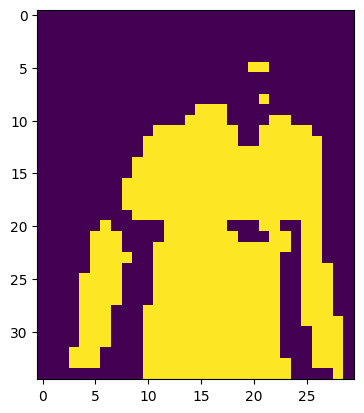

In [13]:
# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into original image shape
clustered_image = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

# Display the labels into the original image shape
plt.imshow(clustered_image)

##### Now we clustered the image color but don't know what is the background color and what is tshirt color. There is always background in corners. So, we take average of corners.

In [14]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key= corner_clusters.count)
print(non_player_cluster)

0


In [15]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [16]:
kmeans.cluster_centers_[player_cluster]

array([176.66896552, 244.33793103, 150.71954023])